In [6]:
import sys
sys.path.insert(0, '..')

In [1]:
import pandas as pd
from datetime import datetime
import gpxpy

In [2]:
data = pd.read_csv('ski_2000_01_01_0000.csv',names=['Lat','Lon','GPS_Alt','Time'])

In [3]:
data.shape

(7326, 4)

In [4]:
data.head()

,Lat,Lon,GPS_Alt,Time
0,41.78118N,23.43906E,0.00,08:14.14
1,41.78118N,23.43904E,1598.80,08:14.15
2,41.78117N,23.43904E,1606.24,08:14.16
3,41.78116N,23.43904E,1604.71,08:14.18
4,41.78116N,23.43904E,1604.64,08:14.19


In [5]:
data['Lat_first']=data.Lat.apply(lambda x: x[0:2])

In [6]:
data.Lat_first.value_counts()

Lat_first
41    7326
Name: count, dtype: int64

In [7]:
data_bulgaria = data.loc[data.Lat_first=='41'].copy()
data_London = data.loc[data.Lat_first=='51'].copy()

In [8]:
data_bulgaria['Date']=datetime(2025,1,31).date()
# data_London['Date']=datetime(2025,1,28).date()

In [9]:
data_bulgaria.head()

,Lat,Lon,GPS_Alt,Time,Lat_first,Date
0,41.78118N,23.43906E,0.00,08:14.14,41,2025-01-31
1,41.78118N,23.43904E,1598.80,08:14.15,41,2025-01-31
2,41.78117N,23.43904E,1606.24,08:14.16,41,2025-01-31
3,41.78116N,23.43904E,1604.71,08:14.18,41,2025-01-31
4,41.78116N,23.43904E,1604.64,08:14.19,41,2025-01-31


<Axes: >

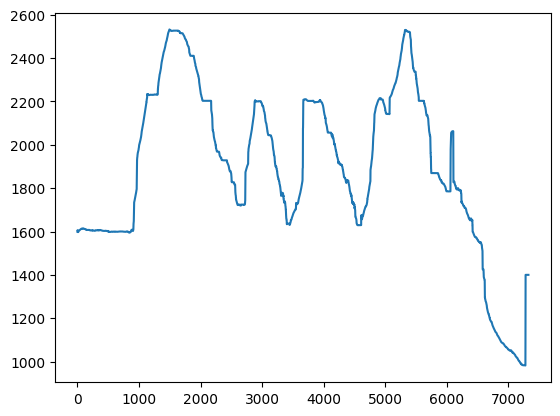

In [12]:
data_bulgaria.loc[data_bulgaria.GPS_Alt!=0].GPS_Alt.plot()

In [11]:
data_bulgaria.to_pickle('bulgaria_2025_01_31_temp.pkl')

In [36]:
data_London.to_pickle('london_2025_01_28_temp.pkl')

### to gpx

In [39]:
# import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)

# Create first segment in our GPX track:
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)

# Create points:
for idx in data_bulgaria.index:
    gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(data_bulgaria.loc[idx, 'Lat'], data_bulgaria.loc[idx, 'Lon']))

# print(gpx.to_xml())

with open('bulgaria_2025_1_30.gpx', 'w') as f:
    f.write(gpx.to_xml())

### convert data

In [79]:
from skitracker_utils import prepare_data,find_routes,save_json_run,save_gpx_run

In [16]:
def alter_coords(val):

    return float(val[:-1])

In [64]:
data = pd.read_pickle('bulgaria_2025_01_31_temp.pkl')

In [65]:
data['Lat']= data.Lat.apply(alter_coords)
data['Lon']= data.Lon.apply(alter_coords)
data['Pres_Alt']=data['GPS_Alt']
data['Date']=data.Date.apply(lambda x: x.strftime('%m/%d/%Y '))
data['Time']=data.Time.apply(lambda x: x[0:5]+':'+x[6:8]+' ')

In [66]:
data.head()

,Lat,Lon,GPS_Alt,Time,Lat_first,Date,Pres_Alt
0,41.78118,23.43906,0.00,08:14:14,41,01/31/2025,0.00
1,41.78118,23.43904,1598.80,08:14:15,41,01/31/2025,1598.80
2,41.78117,23.43904,1606.24,08:14:16,41,01/31/2025,1606.24
3,41.78116,23.43904,1604.71,08:14:18,41,01/31/2025,1604.71
4,41.78116,23.43904,1604.64,08:14:19,41,01/31/2025,1604.64


In [67]:
prep_data = prepare_data(data)

In [84]:
runs = find_routes(prep_data)

In [85]:
save_gpx_run(runs,'BG_2025_01_31')

In [86]:
save_json_run(runs, 'BG_2025_01_31')